# 4. Topology: network properties

Import Dependencies & Load dataset

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

Example: Florenntine families graph

In [ ]:
l = 6 # num cliques
k = 4 # cliques size

In [ ]:
G = nx.florentine_families_graph()

In [ ]:
pos = nx.spring_layout(G, iterations=50, seed=0)

Text(0.5, 1.0, '$Florentine\\ families\\ graph$')

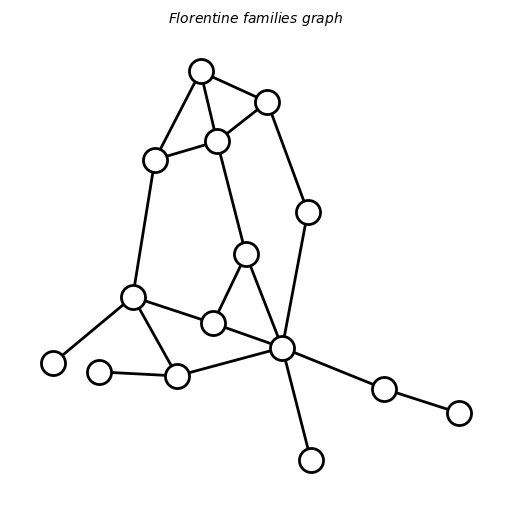

In [ ]:
fig, axs = plt.subplots(figsize=(5,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color='white', linewidths=2, edgecolors='k', ax=axs)
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=10)

## 4.1. Topology measures

#### 4.1.3. Network size ($N_i$)

Number of nodes.

In [ ]:
network_size = G.number_of_nodes() 
network_size

15

#### 4.1.2. Number of links ($E_i$)

Number of edges or connections.

In [ ]:
number_of_links = G.number_of_edges() 
number_of_links

20

#### 4.1.3. Node degree ($deg_{i,u}$)

In [ ]:
G.degree()

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [ ]:
G.degree()

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [ ]:
dict(G.degree()).values()

dict_values([1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1])

In [ ]:
G_degrees = np.array(list(dict(G.degree()).values()))
G_degrees

array([1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1])

#### 4.1.4. Density ($d_i$)

 Ratio of actual connections $d_i = \frac{2 E_i}{N_i (N_i - 1)}$ for undirected graphs and $d_i = \frac{E_i}{N_i (N_i - 1)}$ for directed ones.

In [ ]:
density = nx.density(G) 
density, 2*(number_of_links/(network_size*(network_size-1)))

(0.19047619047619047, 0.19047619047619047)

#### 4.1.5. Accumulated degree ($K_i$)

 Total contacts in Graph $i$.
 
 $K_i = \sum_n k_n$

In [ ]:
accumulated_degree = np.sum(G_degrees)
accumulated_degree

40

#### 4.1.6. Weighted links of attribute `attr` ($W_i$)

Sum of weighted links based on a given attribute $attr$.

$W_i = \sum_u \sum_{u > v} w_{uv}^{attr}$

In [ ]:
number_connected_components = nx.number_connected_components(G)
number_connected_components

1

#### 4.1.7. Number of components ($c_i$)

In [ ]:
number_connected_components = nx.number_connected_components(G)
number_connected_components

1

Network structure/fragmentation.

#### 4.1.8. Nodos en la componente principal ($S_i$)

Network structure/fragmentation.

#### 4.1.9. Mean clustering coefficient $\langle C_i \rangle$

Probabbility of common neighbours.

$\langle C_i \rangle = \frac{1}{N_i} \sum_n C^\prime_{n,i}$, where $C^\prime_{n,i} = \frac{E^{(n)}}{k_n(k_n-1)}$

In [ ]:
mean_clustering_coef = nx.average_clustering(G)
mean_clustering_coef

0.16

#### 4.1.10. Number of triangles ($\#\Delta$)

Number of triangles that includes a given node as one of its vertex.

In [ ]:
nx.triangles(G)

{'Acciaiuoli': 0,
 'Medici': 1,
 'Castellani': 1,
 'Peruzzi': 2,
 'Strozzi': 2,
 'Barbadori': 0,
 'Ridolfi': 1,
 'Tornabuoni': 1,
 'Albizzi': 0,
 'Salviati': 0,
 'Pazzi': 0,
 'Bischeri': 1,
 'Guadagni': 0,
 'Ginori': 0,
 'Lamberteschi': 0}

#### Transitivity ($C_i$) (`Don't include`)



"""Compute graph transitivity, the fraction of all possible triangles present in G.

Possible triangles are identified by the number of triads (two edges with a shared vertex)."""

$C_i = \frac{3 \cdot \#\Delta}{\#triads}$.

In [ ]:
G_tri = np.array(list(dict(nx.triangles(G)).values()))

In [ ]:
G_tri

array([0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
average_triangles = np.mean(G_tri)
average_triangles

0.6

#### 4.1.11. Average path length $\langle l \rangle$

Social accessibility between non-interactings.

$\langle l \rangle = \sum \sum l_{i,j}$

In [ ]:
average_shortest_path_length = nx.average_shortest_path_length(G)
average_shortest_path_length

2.4857142857142858

## 4.2. Example: Comparison of topology metric between two networks

In thi section, we will compare the topology of two networks based on some of previous measures.

First, we will compare "Florentine famimilies" and "Karate-Club" graphs:

In [ ]:
G1 = nx.florentine_families_graph()
G2 = nx.karate_club_graph()

Text(0.5, 1.0, '"Karate club"')

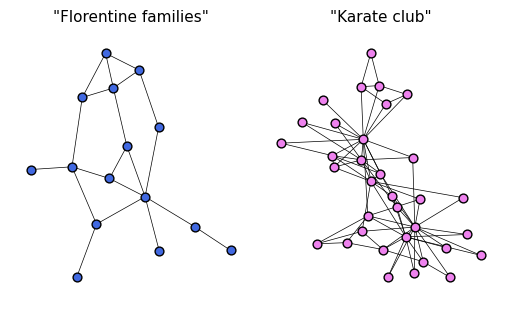

In [ ]:
fig, axs = plt.subplots(figsize=(5,3), facecolor='w', nrows=1, ncols=2, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})

pos = nx.spring_layout(G1, iterations=100, seed=0)
sc = nx.draw_networkx_nodes(G1, pos, node_color='royalblue', linewidths=1, edgecolors='k', ax=axs[0], node_size=40)
nx.draw_networkx_edges(G1, pos, width=.5, ax=axs[0])

pos = nx.spring_layout(G2, iterations=100, seed=0)
sc = nx.draw_networkx_nodes(G2, pos, node_color='violet', linewidths=1, edgecolors='k', ax=axs[1], node_size=40)
nx.draw_networkx_edges(G2, pos, width=.5, ax=axs[1])
axs[0].axis('off'); axs[1].axis('off');
axs[0].set_title('"Florentine families"', fontsize=11)
axs[1].set_title('"Karate club"', fontsize=11)

Thus, for both graphs, we will compute the next metrics:
+ Network size ($N_i$)
+ Number of links ($N_i$)
+ Average node degree ($\langle K_{i} \rangle$)
+ Density ($d_i$)
+ Accumulated degree ($K_i$)
+ Mean clustering coefficient ($\langle C_i \rangle$)
+ Average number of triangles ($\langle \# \Delta \rangle$)
+ Average path length ($\langle l \rangle$)



In [ ]:
def get_topology_values(G):
  # input:
  # G: Networkx Graph
  # out:
  # dict (key: metric name, value: metric value)

  d_topology_vals = {
      "network_size" : G.number_of_nodes(),
      "number_of_links" : G.number_of_edges(),
      "avg_degree" : np.mean(list(dict(G.degree()).values())),
      "accumulated_degeree" : np.sum(list(dict(G.degree()).values())),
      "avg_clustering_coef" : nx.average_clustering(G),
      "avg_triangles" : np.mean(list(nx.triangles(G).values())),
      "avg_path_length" : nx.average_shortest_path_length(G),
  }

  return d_topology_vals

In [ ]:
topology_G1 = get_topology_values(G1)
topology_G2 = get_topology_values(G2)

In [ ]:
df = pd.DataFrame([topology_G1, topology_G2])

In [ ]:
rowLabels=[
    r"$N_i$", r"$E_i$", r"$\langle K_i \rangle$",
    r"$K_i$", r"$\langle C_i \rangle$", r"$\langle \# \Delta \rangle$",
    r"$\langle l \rangle$",
    ]

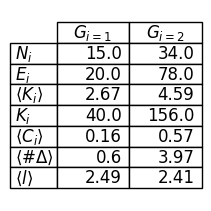

In [ ]:
fig, axs = plt.subplots(figsize=(2,2), facecolor="w", nrows=1, ncols=1, constrained_layout=True)
axs.axis('tight')
axs.axis('off')
table = axs.table(
    cellText=np.round(df.T.values, 2), 
    colLabels=["$G_{i=1}$", "$G_{i=2}$"], rowLabels=rowLabels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)

---